In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [9]:
df = pd.read_csv('E:\Datasets\ITC.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-04-17,276.549988,282.500000,275.549988,279.100006,224.979813,4831017
1,2017-04-18,280.200012,284.000000,278.100006,279.049988,224.939514,4330981
2,2017-04-19,281.149994,281.500000,277.850006,278.700012,224.657410,4952956
3,2017-04-20,279.700012,281.500000,278.350006,279.500000,225.302277,4237611
4,2017-04-21,282.000000,282.000000,272.700012,274.350006,221.150909,8706432
...,...,...,...,...,...,...,...
1478,2023-04-06,386.649994,390.299988,384.200012,387.350006,387.350006,12897667
1479,2023-04-10,387.350006,390.000000,384.750000,388.549988,388.549988,6783022
1480,2023-04-11,388.549988,398.100006,388.000000,396.000000,396.000000,18237451
1481,2023-04-12,397.750000,397.799988,392.100006,393.549988,393.549988,9747526


In [4]:
df.shape

(1483, 7)

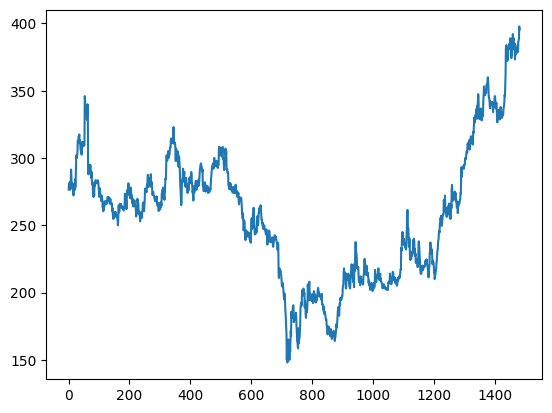

In [6]:
open = df['Open']
plt.plot(open)

In [7]:
ods = open.values

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_ods = scaler.fit_transform(np.array(ods).reshape(-1,1))
scaled_ods

array([[0.51471467],
       [0.52932938],
       [0.53313311],
       ...,
       [0.96316312],
       [1.        ],
       [0.99099099]])

In [10]:
len(scaled_ods), len(ods)

(1483, 1483)

In [12]:
train_ods, test_ods = train_test_split(scaled_ods, test_size = 0.2)
train_ods,test_ods

(array([[0.52932938],
        [0.07527529],
        [0.22142143],
        ...,
        [0.36456458],
        [0.53253253],
        [0.2198198 ]]),
 array([[0.51151151],
        [0.25425425],
        [0.6730731 ],
        [0.4082082 ],
        [0.25625626],
        [0.1961962 ],
        [0.63603606],
        [0.13013013],
        [0.1961962 ],
        [0.47367363],
        [0.24624625],
        [0.23183181],
        [0.48048048],
        [0.53653654],
        [0.13293292],
        [0.08068066],
        [0.54314312],
        [0.58458458],
        [0.37637638],
        [0.59519517],
        [0.35315314],
        [0.49309307],
        [0.76896892],
        [0.56976972],
        [0.91691692],
        [0.20780778],
        [0.16016016],
        [0.48708706],
        [0.62062062],
        [0.53773769],
        [0.42882885],
        [0.64064064],
        [0.52392395],
        [0.93693694],
        [0.63663664],
        [0.24624625],
        [0.10810811],
        [0.28188186],
        [0.482282

In [13]:
def create_ds(dataset, time_step):
    xtrain, ytrain = [], []
    for i in range (len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        xtrain.append(a)
        ytrain.append(dataset[i+time_step,0])
    return np.array(xtrain), np.array(ytrain)

In [14]:
time_step = 100
x_train,y_train = create_ds(train_ods,time_step)
x_test, y_test = create_ds(test_ods, time_step)

In [15]:
x_train.shape, y_train.shape

((1085, 100), (1085,))

In [16]:
x_test.shape, y_test.shape

((196, 100), (196,))